In [21]:
import sys
sys.path.append("..")
import util

import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

import seaborn as sns

_PROJECTION = ccrs.Mercator.GOOGLE
# _PROJECTION = ccrs.Robinson()

## Phytoplankton Data Summary Plots

In [2]:
isolates = pd.read_csv(
    "../../data/Phytoplankton_temperature_growth_rate_dataset_2016_01_29/traits_derived_2016_01_29.csv",
    engine='python'
)

In [3]:
len(isolates)

474

In [4]:
isolates.groupby('habitat').count().iloc[:, 0]

habitat
estuarine       43
freshwater     214
hot spring       2
marine         206
saline lake      6
salt marsh       1
unknown          2
Name: isolate.code, dtype: int64

In [5]:
isolates = isolates[
    (isolates.habitat == 'marine') &
    (isolates.curvequal == 'good')
].dropna(subset=['isolation.latitude', 'isolation.longitude'])

In [6]:
print(f"Num Isolates: {len(isolates)}")

Num Isolates: 89


## Plot by Order

In [7]:
isolates.group = isolates.group.str.title()

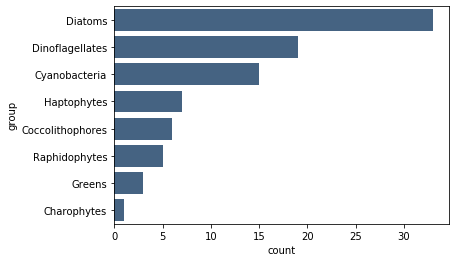

In [8]:

sns.countplot(y='group', data=isolates, order=isolates.group.value_counts().sort_values(ascending=False).index, color='xkcd:denim')

## Add Map

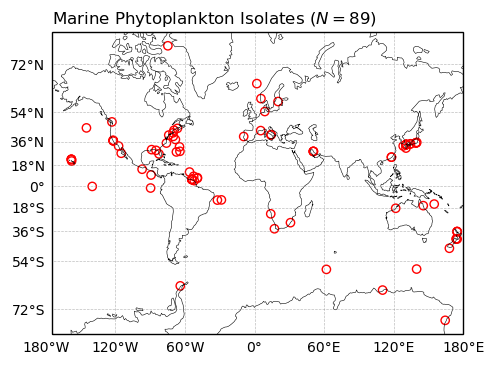

In [9]:
fig = plt.figure(dpi=100)
ax = plt.axes(projection=_PROJECTION)
ax.scatter(
    isolates['isolation.longitude'],
    isolates['isolation.latitude'],
    transform = ccrs.PlateCarree(), 
    facecolor='none', edgecolors='r'
)
ax.add_feature(cf.COASTLINE, linewidth=0.4)
util.add_gridlines(ax)

plt.title(f"Marine Phytoplankton Isolates ($N = {len(isolates)}$)", loc='left');
# plt.savefig("figures/marine_phyto_isolates.png", dpi=300, bbox_inches='tight')

## Combine

In [10]:
groups = isolates.group.unique()
group_colors = sns.color_palette('bright', n_colors = len(groups))
group_colormap = {g:c for g,c in zip(groups, group_colors)}

In [11]:
isolates['color'] = isolates.group.apply(lambda x: group_colormap[x])


In [12]:
isolate_counts= isolates.groupby('group').count().iloc[:, 0].rename('Isolates')
species_counts=isolates.groupby(['group']).speciesname.unique().apply(lambda x: len(x)).rename("Species")
groupdata = pd.melt(pd.merge(isolate_counts, species_counts, left_index=True, right_index=True).reset_index(), id_vars=['group'])

In [13]:
groupdata

,group,variable,value
0,Charophytes,Isolates,1
1,Coccolithophores,Isolates,6
2,Cyanobacteria,Isolates,15
3,Diatoms,Isolates,33
4,Dinoflagellates,Isolates,19
5,Greens,Isolates,3
6,Haptophytes,Isolates,7
7,Raphidophytes,Isolates,5
8,Charophytes,Species,1
9,Coccolithophores,Species,3


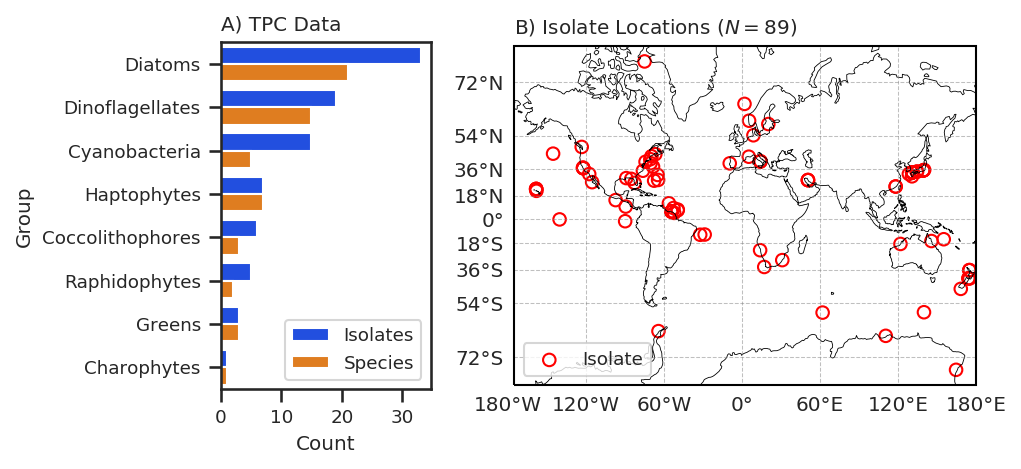

In [27]:
sns.set(font_scale=0.8, style='ticks')
# plt.style.use('default')
sns.set_palette('bright')
fig = plt.figure(figsize=(6.5,3), dpi=150)
gs = fig.add_gridspec(1, 2, width_ratios=[1,2.2], wspace=0.25)

bar_ax = fig.add_subplot(gs[0])
bp = sns.barplot(y='group', x='value', hue='variable', data=groupdata, order=isolates.group.value_counts().sort_values(ascending=False).index, ax=bar_ax)#, palette=group_colormap)
bar_ax.set_title("A) TPC Data", loc='left')
bar_ax.set_ylabel("Group")
bar_ax.set_xlabel("Count")
bar_ax.set_xticks([0, 10, 20, 30])
bar_ax.get_legend().set_title("")

# bar_ax.annotate("$N = " + f"{len(isolates)}$", (0.96, 0.28), xycoords='axes fraction', ha='right', va='center', alpha=0.7)


map_ax = fig.add_subplot(gs[1], projection=_PROJECTION)

map_ax.scatter(
    isolates['isolation.longitude'],
    isolates['isolation.latitude'],
    transform = ccrs.PlateCarree(), 
    facecolor='none', edgecolors='red',#isolates['color'],
    label='Isolate'
)
map_ax.add_feature(cf.COASTLINE, linewidth=0.4)
map_ax.set_ylabel("Latitude [deg]")
map_ax.legend(loc='lower left')

# map_ax.set_global()
util.add_gridlines(map_ax)

# plt.tight_layout(h_pad=16)
map_ax.set_title(f"B) Isolate Locations ($N = {len(isolates)}$)", loc='left');
# plr
plt.savefig("marine_phyto_isolates_group_map.png", dpi=300, bbox_inches='tight')

## Some Useful Statistics

In [15]:
print(isolates['isolation.latitude'].min())
print(isolates['isolation.latitude'].max())

-74.83
76.28


In [16]:
# genera
print(len(isolates.genus.unique()))

41


In [17]:
genus_species = isolates.genus + isolates.species

In [18]:
# species
print(len(genus_species.dropna().unique()))

48


In [19]:
isolates.groupby(genus_species).count()l

SyntaxError: invalid syntax (<ipython-input-19-2bc500aa1b3a>, line 1)

In [5]:
df_ch

NameError: name 'df_ch' is not defined

In [3]:
lowess_smooth(chl_d)

TypeError: lowess_smooth() missing 1 required positional argument: 'data'